In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import json
import os

from cell_inference.config import paths, params
from cell_inference.utils.data_manager import NpzFilesCollector

In [2]:
TRIAL_NAME = 'Reduced_Order_stochastic_spkwid_trunkLR4_LactvCa_Loc3_h1_Bio5'

DATA_PATH = paths.SIMULATED_DATA_PATH
TRIAL_PATH = os.path.join(DATA_PATH, TRIAL_NAME)

CONFIG_PATH = os.path.join(TRIAL_PATH, 'config.json')  # trial configuration
NSPK_PATH = os.path.join(TRIAL_PATH, 'nspk.npz')  # summary statistics

In [3]:
try:
    NSPK = np.load(NSPK_PATH)
except:
    NSPK = NpzFilesCollector(NSPK_PATH)
with NSPK:
    nspk = NSPK['nspk']
    firing_rate = NSPK['firing_rate']
    duration = NSPK['duration']
    labels = NSPK['y']
    nspk_range = NSPK['nspk_range']
    fr_range = NSPK['fr_range']
fr_range = np.clip(fr_range, *(1000 * nspk_range / duration))
fr_range[1] = min(1000 * nspk_range[1] / duration, fr_range[1])
nspk_range = fr_range * duration / 1000

valid = np.nonzero((firing_rate >= fr_range[0]) & (firing_rate <= fr_range[1]))[0]
print(f"{valid.size:d} ({100 * valid.size / nspk.shape[0]:.1f}%) valid samples out of {nspk.shape[0]:d} in total.")

5240 (87.3%) valid samples out of 6000 in total.


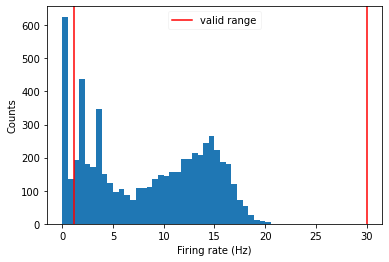

In [4]:
bins = 1000 * np.arange(nspk.max() + 1) / duration
plt.figure()
plt.hist(firing_rate, bins=bins)
plt.axvline(fr_range[0], color='r', label='valid range')
plt.axvline(fr_range[1], color='r')
plt.xlabel('Firing rate (Hz)')
plt.ylabel('Counts')
plt.legend(loc='upper center', framealpha=0.2)
plt.show()

In [5]:
show_labels = ['s_nat', 's_kv3.1']

with open(CONFIG_PATH, 'r') as f:
    config_dict = json.load(f)

inference_list = config_dict['Trial_Parameters']['inference_list']
ilabels = list(map(inference_list.index, show_labels))
ranges = {k: v.copy() for p in ['loc', 'geo', 'bio'] \
    for k, v in config_dict['Simulation_Parameters'].get(p + '_param_range', {}).items()}

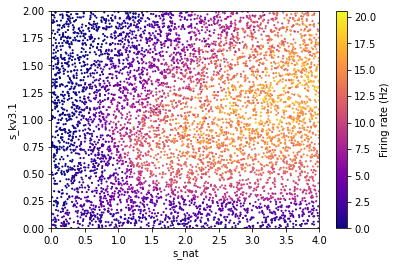

In [6]:
plt.figure()
sc = plt.scatter(labels[:, ilabels[0]], labels[:, ilabels[1]], s=5, c=firing_rate, marker='.', cmap='plasma')
plt.colorbar(sc, label='Firing rate (Hz)')
plt.xlim(ranges[show_labels[0]])
plt.ylim(ranges[show_labels[1]])
plt.xlabel(show_labels[0])
plt.ylabel(show_labels[1])
plt.show()